In [1]:
import tensorflow as tf
import cv2
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
path = "/content/gdrive/MyDrive/Colab Notebooks/spectograms/"
# load image
X = []
y = []
for i in range(10):
    os.chdir(f"{path}/{i}")
    for file in os.listdir():
        image = cv2.imread(f"{path}/{i}/{file}")
        image_resized = cv2.resize(image,(128, 96))
        # convert image to numpy array
        X.append(image_resized)
        y.append(i)
X = np.array(X)
y = np.array(y)
print(X[0].shape)

(96, 128, 3)


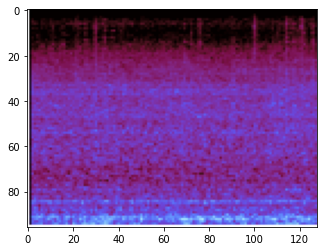

In [3]:
plt.imshow(X[0])
plt.show()

Split the dataset into training, validation and test datasets. 80% for training, 10% for validation and 10% for test sets.

In [4]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validation and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

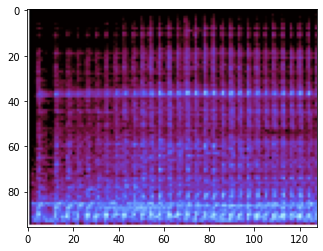

In [5]:
plt.imshow(X_test[500])
plt.show()

In [6]:
# Print the lengths of the X, X_train, X_val and X_test
print(f'Length of the dataset: {len(X)}')
print(f'Length of the training datasets: {len(X_train)}')
print(f'Length of the validation datasets: {len(X_val)}')
print(f'Length of the test datasets: {len(X_test)}')

Length of the dataset: 8732
Length of the training datasets: 6985
Length of the validation datasets: 873
Length of the test datasets: 874


Normalization

In [7]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [8]:
X_test[0]

array([[[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ],
        ...,
        [0.01176471, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ]],

       [[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ]],

       [[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.15686275, 0.01960784, 0.09019608],
        [0.49803922, 0

In [9]:
# Create a model object
model = tf.keras.Sequential()

In [10]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",
                                 input_shape=(96,128,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [11]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",))

In [12]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [13]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [14]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [15]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs = 25,
                    validation_data = (X_val, y_val))

Epoch 1/25
55/55 [==============================] - 18s 102ms/step - loss: 2.1966 - accuracy: 0.1921 - val_loss: 1.7915 - val_accuracy: 0.4250
Epoch 2/25
55/55 [==============================] - 4s 74ms/step - loss: 1.8126 - accuracy: 0.3599 - val_loss: 1.3667 - val_accuracy: 0.5338
Epoch 3/25
55/55 [==============================] - 4s 73ms/step - loss: 1.5209 - accuracy: 0.4660 - val_loss: 1.1017 - val_accuracy: 0.6598
Epoch 4/25
55/55 [==============================] - 4s 74ms/step - loss: 1.2963 - accuracy: 0.5563 - val_loss: 0.9358 - val_accuracy: 0.7274
Epoch 5/25
55/55 [==============================] - 4s 74ms/step - loss: 1.1382 - accuracy: 0.6157 - val_loss: 0.8405 - val_accuracy: 0.7331
Epoch 6/25
55/55 [==============================] - 4s 74ms/step - loss: 1.0539 - accuracy: 0.6356 - val_loss: 0.7489 - val_accuracy: 0.7698
Epoch 7/25
55/55 [==============================] - 4s 74ms/step - loss: 0.9195 - accuracy: 0.6780 - val_loss: 0.6585 - val_accuracy: 0.8030
Epoch 8/25


Visualize the results

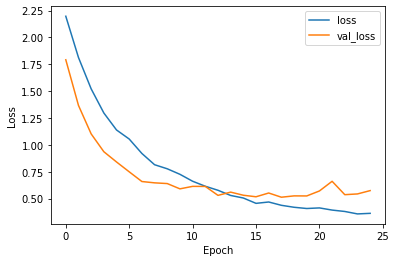

In [17]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

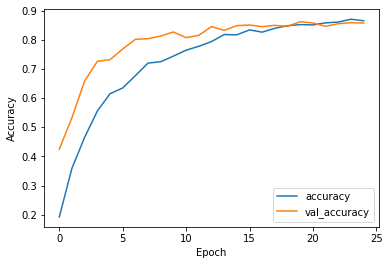

In [18]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [19]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 13ms/step - loss: 0.5727 - accuracy: 0.8638


[0.5726602673530579, 0.8638443946838379]

In [20]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[2].reshape(1,96,128,3))

# Print the prediction result
prediction_result

array([[2.1974212e-11, 3.5957286e-11, 5.9146653e-11, 9.7964385e-06,
        2.5585822e-10, 2.0722501e-08, 7.0387077e-16, 7.5571847e-11,
        9.9998999e-01, 2.6182121e-07]], dtype=float32)

In [21]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [22]:
# Print the results
print(f'this image belongs to class {predicted_class} with {predicted_probability} probability % ')

this image belongs to class 8 with 0.9999899864196777 probability % 
